In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import time

In [12]:
df=pd.read_csv("Fraud_Analysis_Dataset.csv")

In [13]:
print("Dataset shape:", df.shape)
print("First 5 rows of the dataset:")
print(df.head())

Dataset shape: (11142, 10)
First 5 rows of the dataset:
   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1  


In [14]:
print("Data types and non-null values:")
print(df.info())

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None


In [15]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.946618e+03   4.270000e+02    0.000000e+00   
50%        6.000000  1.676126e+04   2.816950e+04    4.420605e+03   
75%        7.000000  1.543366e+05   3.040855e+05    1.114126e+05   
max       95.000000  1.000000e+07   1.990000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.114200e+04    1.114200e+04  11142.000000  
mean     8.883541e+05    1.103211e+06      0.102495  
std      2.601376e+06    2.982447e+06      0.303312  
min      0.000000e+00    0.000000e+00      0.000000  
25%      0.000000e+00    0.000000e+00      0.000000  
50%      0.000000e+00    0.000000e+00      

In [16]:
print("Missing values in each columns:")
print(df.isnull().sum())

Missing values in each columns:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [17]:
# Check the distribution of fraud vs non-fraud transactions
print("\
Fraud distribution:")
print(df['isFraud'].value_counts())
print(df['isFraud'].value_counts(normalize=True) * 100)

Fraud distribution:
isFraud
0    10000
1     1142
Name: count, dtype: int64
isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64


In [18]:
# Explore transaction types
print("Transaction types distribution:")
type_counts = df['type'].value_counts()
print(type_counts)

Transaction types distribution:
type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64


C:\Users\Mayank\AppData\Local\Temp\ipykernel_7164\3891597213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


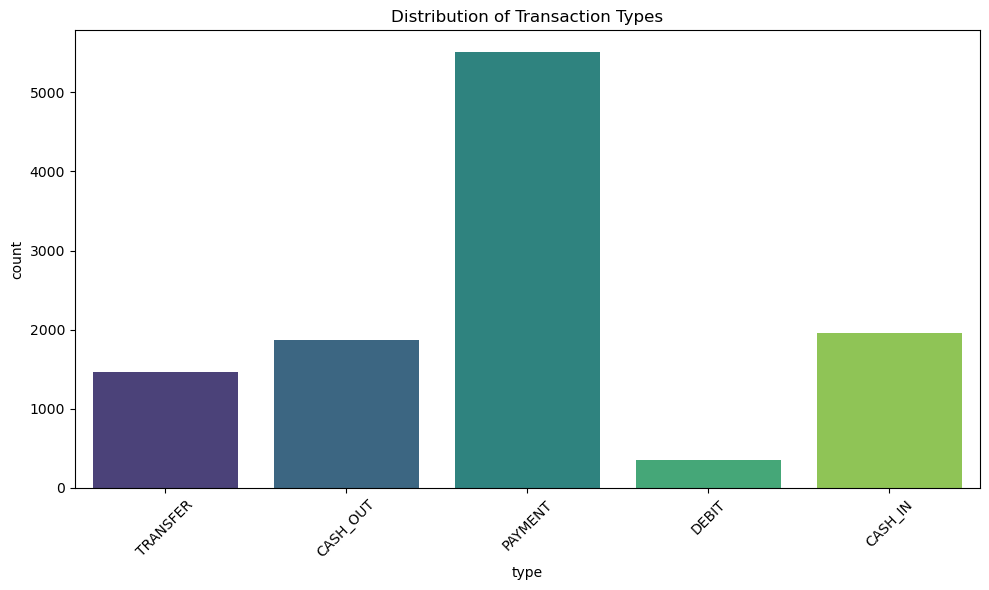

In [19]:
# Visualize transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

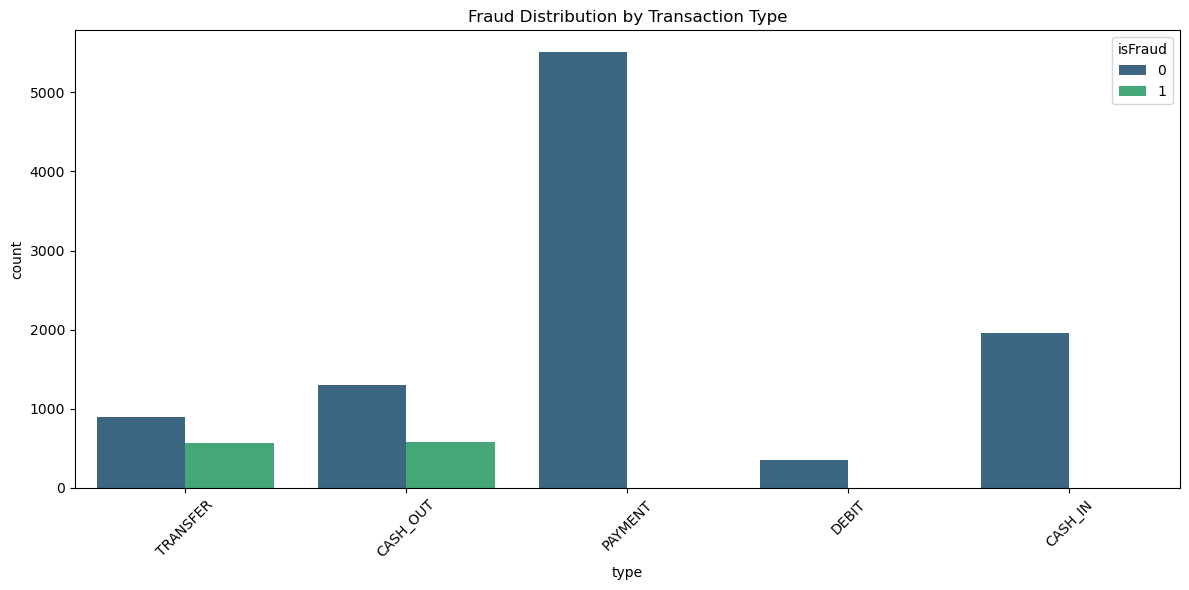

In [25]:
# Visualize fraud by transaction type
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=df, palette='viridis')
plt.title('Fraud Distribution by Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

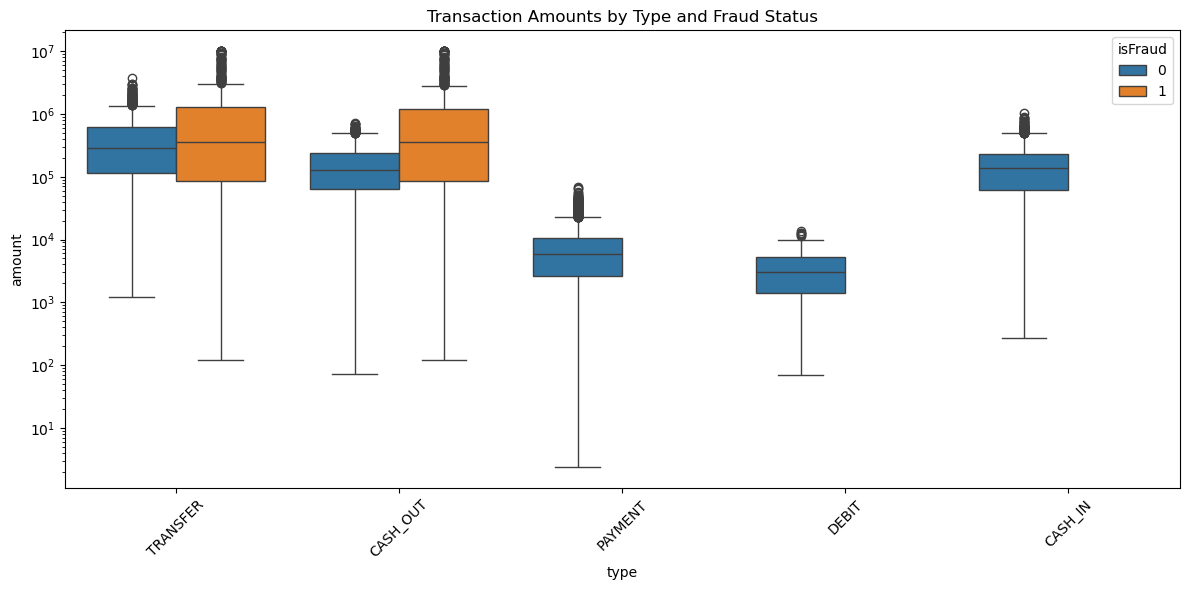

In [21]:
# Analyze transaction amounts
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df)
plt.title('Transaction Amounts by Type and Fraud Status')
plt.yscale('log')  # Using log scale due to potential large variations
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

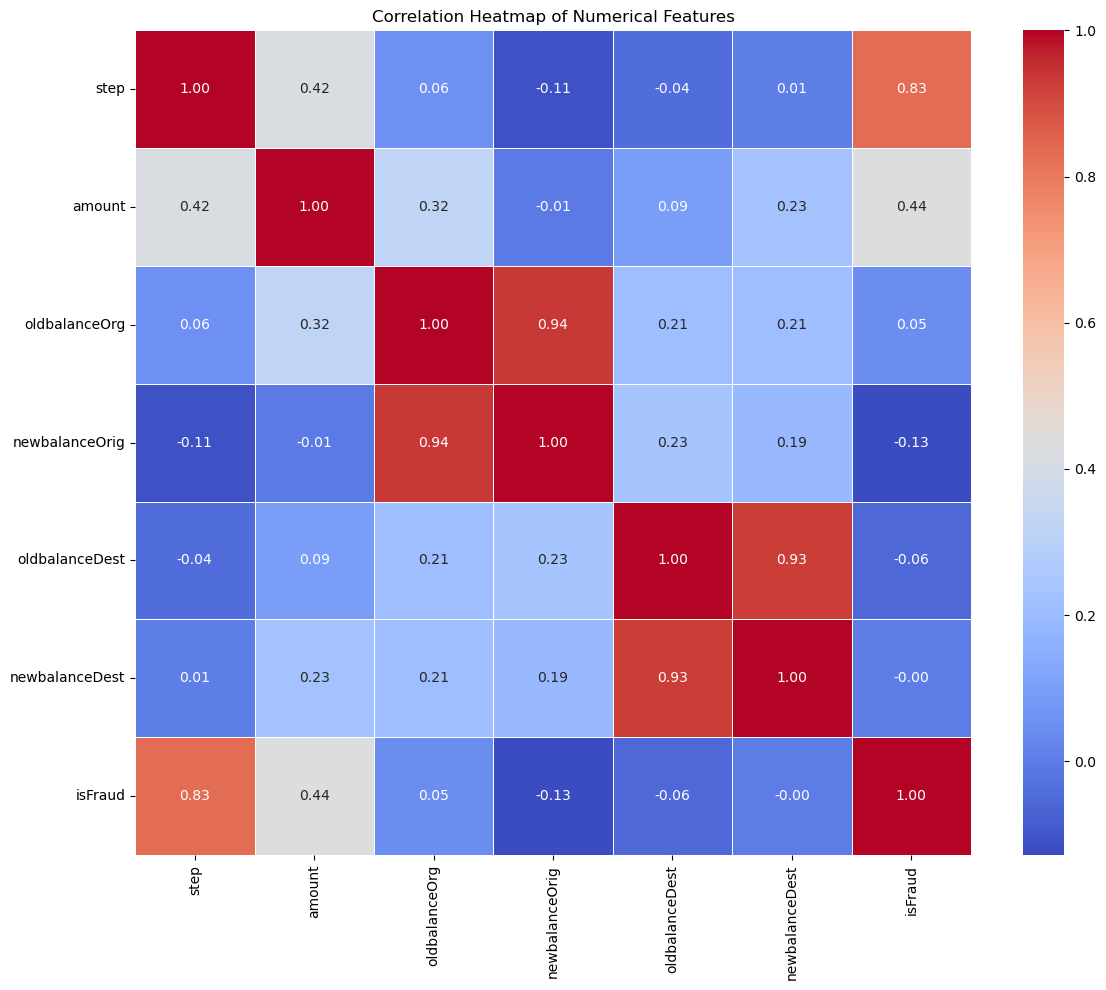

In [22]:
# Check the correlation between numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

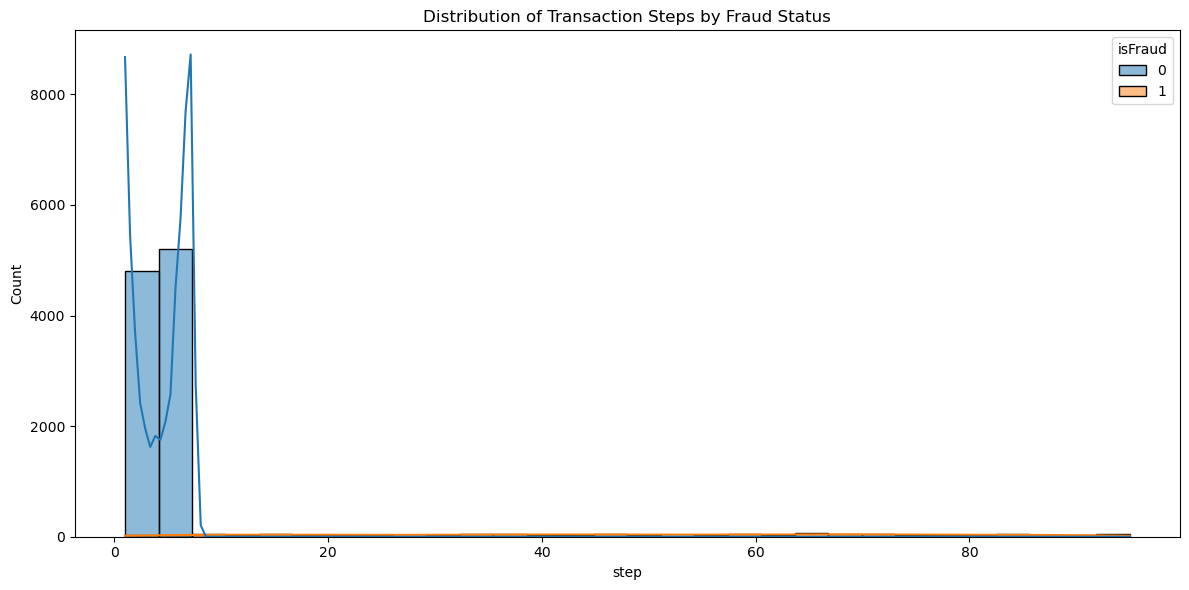

In [23]:

# Analyze transaction steps (time)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='step', hue='isFraud', bins=30, kde=True)
plt.title('Distribution of Transaction Steps by Fraud Status')
plt.tight_layout()
plt.show()


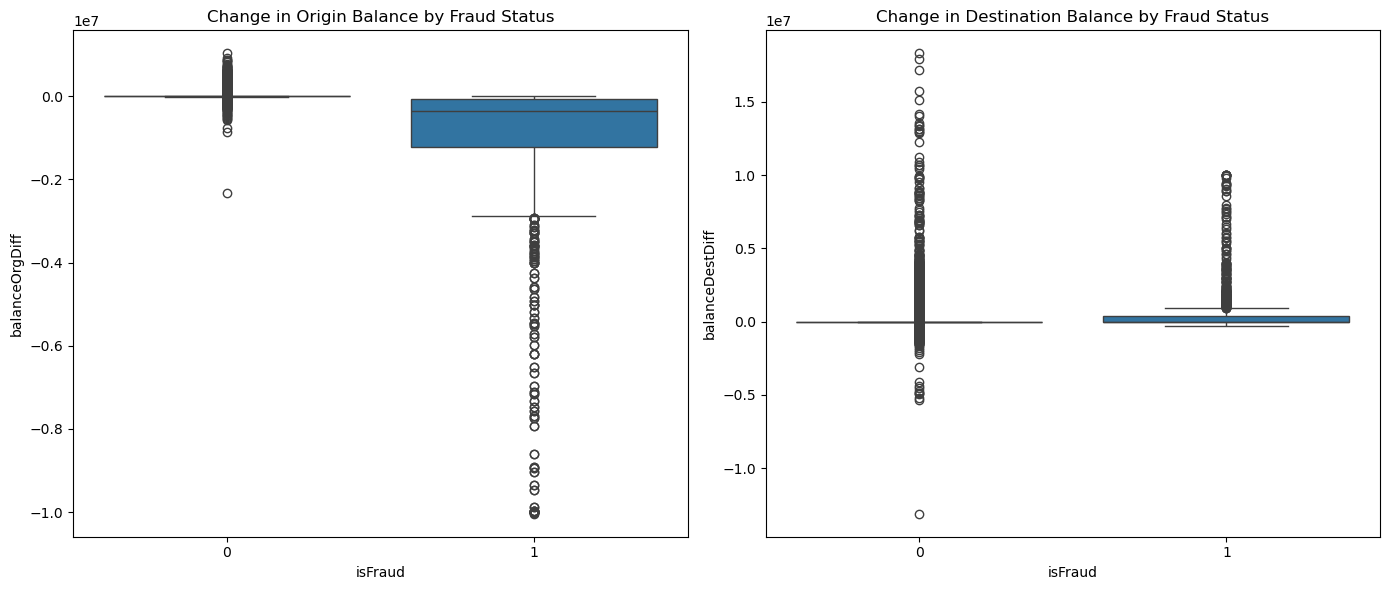

Done with initial exploratory data analysis


In [24]:
# Check balance changes in fraudulent transactions
df['balanceOrgDiff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='isFraud', y='balanceOrgDiff', data=df)
plt.title('Change in Origin Balance by Fraud Status')
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='balanceDestDiff', data=df)
plt.title('Change in Destination Balance by Fraud Status')
plt.tight_layout()
plt.show()

print("Done with initial exploratory data analysis")

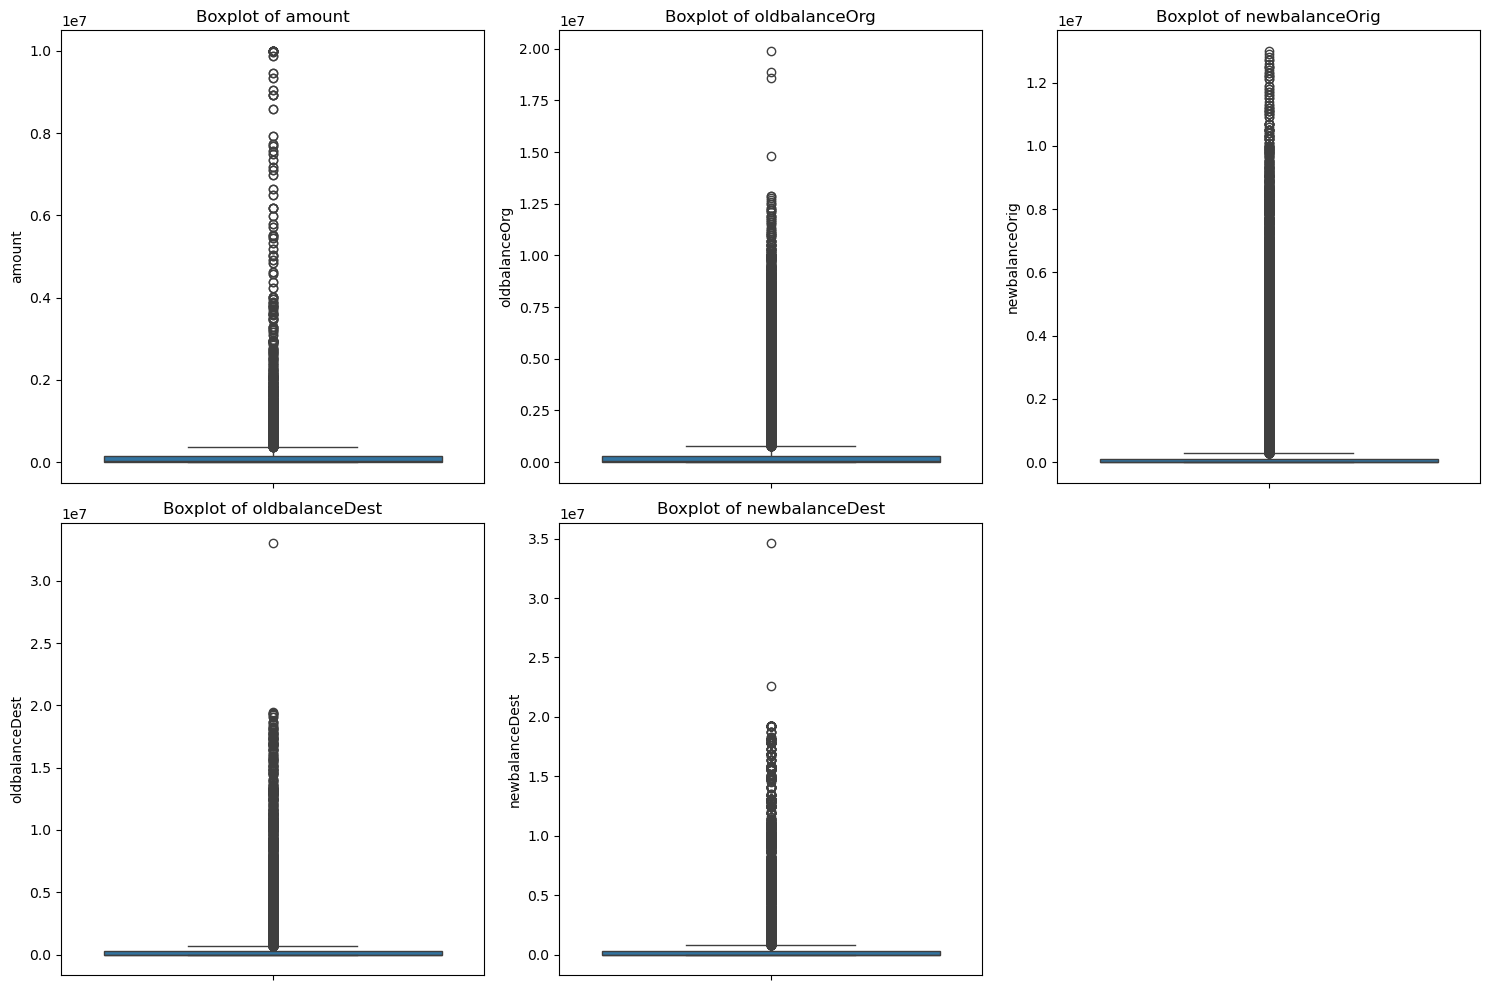

Outliers in amount: 1172 (10.52%)
Lower bound: -219138.31875000003, Upper bound: 378421.51125000004
Min value: 2.39, Max value: 10000000.0
--------------------------------------------------
Outliers in oldbalanceOrg: 2195 (19.70%)
Lower bound: -455060.72, Upper bound: 759573.2
Min value: 0.0, Max value: 19900000.0
--------------------------------------------------
Outliers in newbalanceOrig: 2245 (20.15%)
Lower bound: -167118.9525, Upper bound: 278531.5875
Min value: 0.0, Max value: 13000000.0
--------------------------------------------------
Outliers in oldbalanceDest: 1921 (17.24%)
Lower bound: -406733.20875, Upper bound: 677888.6812499999
Min value: 0.0, Max value: 33000000.0
--------------------------------------------------
Outliers in newbalanceDest: 2214 (19.87%)
Lower bound: -477956.04, Upper bound: 796593.3999999999
Min value: 0.0, Max value: 34600000.0
--------------------------------------------------


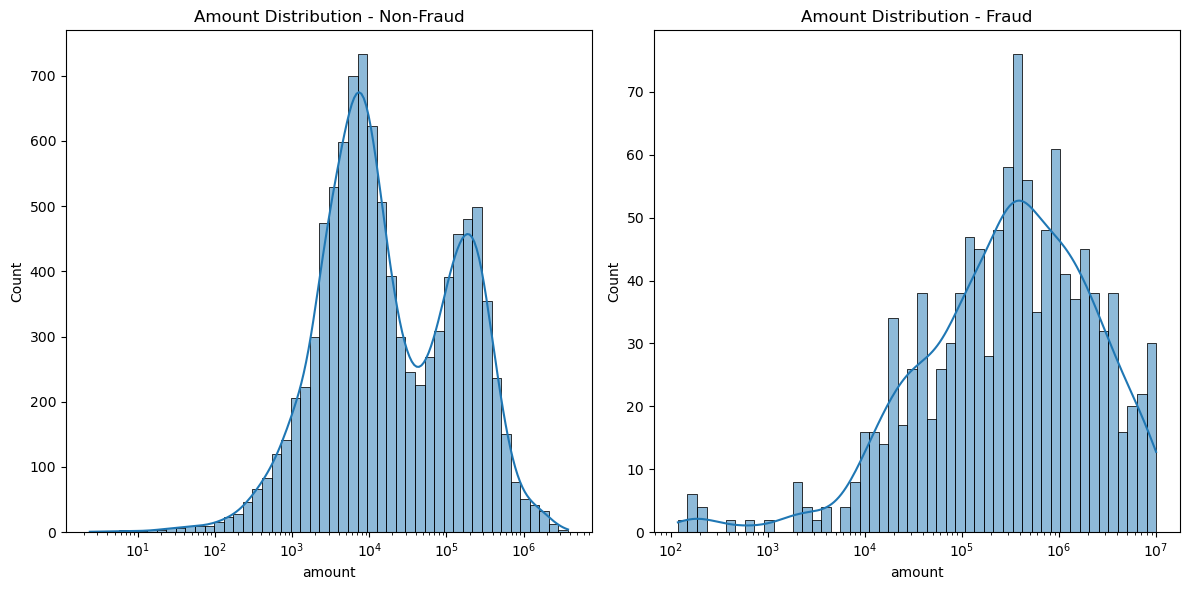

Outlier analysis completed.


In [26]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Numerical columns to check for outliers
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

# Detect outliers for each numerical column
outlier_counts = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)
    print(f"Outliers in {col}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Min value: {df[col].min()}, Max value: {df[col].max()}")
    print("-" * 50)

# Visualize the distribution of amount by fraud status
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['isFraud']==0]['amount'], bins=50, kde=True, log_scale=True)
plt.title('Amount Distribution - Non-Fraud')
plt.subplot(1, 2, 2)
sns.histplot(df[df['isFraud']==1]['amount'], bins=50, kde=True, log_scale=True)
plt.title('Amount Distribution - Fraud')
plt.tight_layout()
plt.show()

print("Outlier analysis completed.")

In [31]:
# Install imbalanced-learn package
%pip install imbalanced-learn

print("Installation completed.")

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.
Installation completed.



Starting feature engineering and data preparation...
Class distribution after SMOTE:
isFraud
0    7500
1    7500
Name: count, dtype: int64
isFraud
0    50.0
1    50.0
Name: proportion, dtype: float64


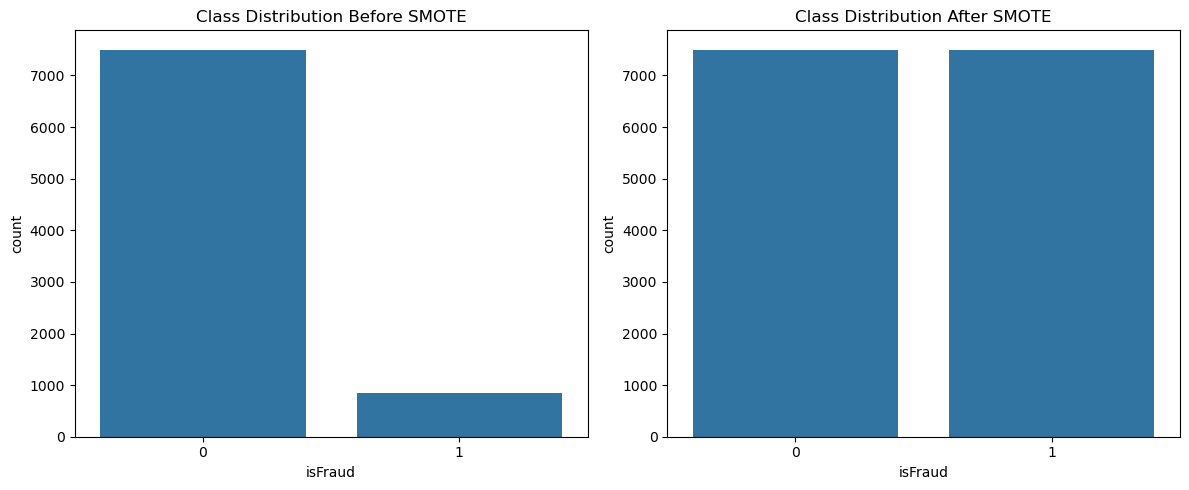

Feature engineering and data preparation completed successfully.
Training set shape: (15000, 18)
Test set shape: (2786, 18)
List of features after engineering:
1. step
2. amount
3. oldbalanceOrg
4. newbalanceOrig
5. oldbalanceDest
6. newbalanceDest
7. balanceOrgDiff
8. balanceDestDiff
9. orgBalanceRatio
10. destBalanceRatio
11. isOrgBalanceZero
12. isDestBalanceZero
13. amountToOrgRatio
14. amountToDestRatio
15. type_CASH_OUT
16. type_DEBIT
17. type_PAYMENT
18. type_TRANSFER


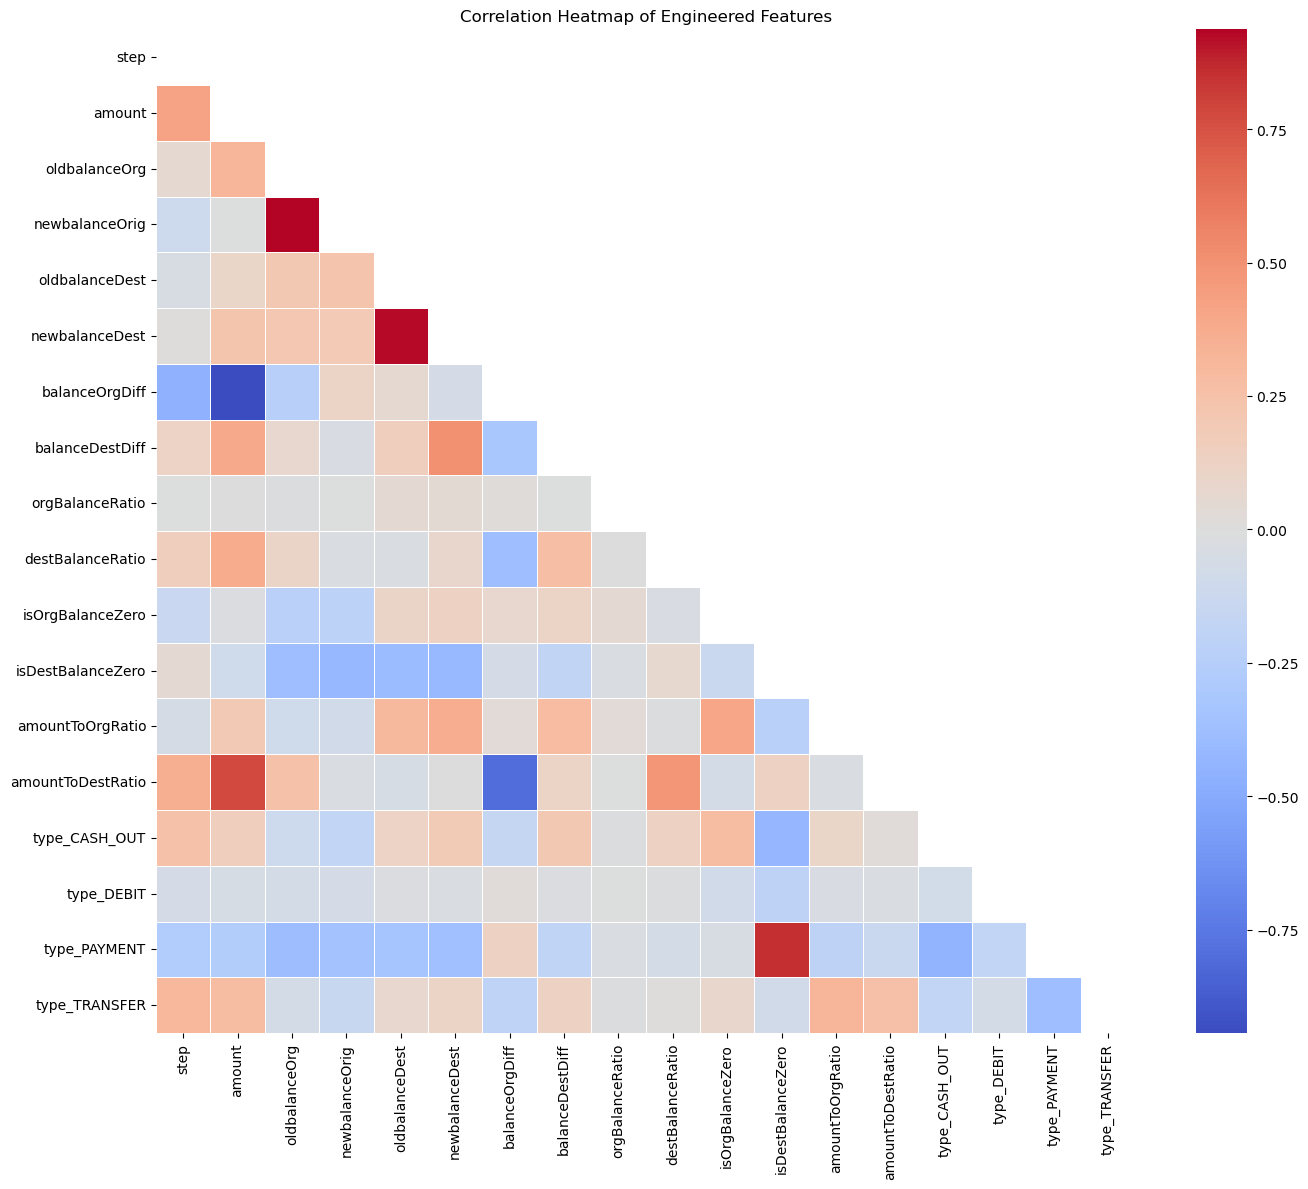

Data preparation and feature engineering completed.
done


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

print("Starting feature engineering and data preparation...")

# Ensure df is defined before feature engineering
try:
    df
except NameError:
    print("Error: DataFrame 'df' is not defined. Please load your data into 'df' before running this script.")
    raise

# Create additional features
df['balanceOrgDiff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

# Create ratio features
df['orgBalanceRatio'] = df['newbalanceOrig'] / (df['oldbalanceOrg'] + 1)  # Avoid division by zero
df['destBalanceRatio'] = df['newbalanceDest'] / (df['oldbalanceDest'] + 1)

# Create a feature for zero balance
df['isOrgBalanceZero'] = (df['oldbalanceOrg'] == 0).astype(int)
df['isDestBalanceZero'] = (df['oldbalanceDest'] == 0).astype(int)

# Create a feature for transaction amount relative to balances
df['amountToOrgRatio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['amountToDestRatio'] = df['amount'] / (df['oldbalanceDest'] + 1)

# One-hot encode the transaction type
encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = encoder.fit_transform(df[['type']])

# Create DataFrame from one-hot encoded columns
type_encoded_df = pd.DataFrame(
    type_encoded, 
    columns=[ 'type_' + cat for cat in encoder.categories_[0][1:] ]
)

# Reset index to ensure proper concat in case of index mismatches
type_encoded_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Concatenate one-hot encoded columns with original df
df = pd.concat([df, type_encoded_df], axis=1)

# Prepare features and target
# Drop non-numeric and identifier columns
X = df.drop(['isFraud', 'nameOrig', 'nameDest', 'type'], axis=1, errors='ignore')
y = df['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after resampling
class_counts = pd.Series(y_train_balanced).value_counts()
print("Class distribution after SMOTE:")
print(class_counts)
print((pd.Series(y_train_balanced).value_counts(normalize=True) * 100).round(2))

# Visualize the class distribution before and after SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title('Class Distribution After SMOTE')
plt.tight_layout()
plt.show()

print("Feature engineering and data preparation completed successfully.")
print("Training set shape: " + str(X_train_balanced.shape))
print("Test set shape: " + str(X_test_scaled.shape))

# Display list of features
print("List of features after engineering:")
for i, feature in enumerate(X.columns):
    print(str(i+1) + '. ' + feature)

# Correlation heatmap of engineered features
plt.figure(figsize=(14, 12))
correlation = X.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Engineered Features')
plt.tight_layout()
plt.show()

print("Data preparation and feature engineering completed.")
print("done")


In [34]:
%pip install xgboost
print("xgboost installed")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
xgboost installed


In [44]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    # Calculate probabilities for ROC curve (if supported)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        has_predict_proba = True
    except AttributeError:
        y_prob = y_pred  # Fallback for models without predict_proba
        has_predict_proba = False

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if has_predict_proba else None

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Return results as a dictionary
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'train_time': train_time,
        'predict_time': predict_time,
        'y_pred': y_pred,
        'y_prob': y_prob if has_predict_proba else None,
        'has_predict_proba': has_predict_proba,
        'model': model
    }

In [45]:
# Initialize models
models = [
    (LogisticRegression(max_iter=1000, random_state=42), "Logistic Regression"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (GradientBoostingClassifier(n_estimators=100, random_state=42), "Gradient Boosting"),
    (XGBClassifier(n_estimators=100, random_state=42), "XGBoost"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (SVC(probability=True, random_state=42), "Support Vector Machine")
]

In [46]:
# Train and evaluate models
results = []
for model, name in models:
    print(f"Training and evaluating {name}...")
    try:
        result = evaluate_model(model, X_train_balanced, X_test_scaled, y_train_balanced, y_test, name)
        results.append(result)
        print(
            f"{name} - Accuracy: {result['accuracy']:.4f}, Precision: {result['precision']:.4f}, "
            f"Recall: {result['recall']:.4f}, F1: {result['f1_score']:.4f}, "
            f"ROC AUC: {result['roc_auc']:.4f if result['roc_auc'] is not None else 'N/A'}"
        )
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

Training and evaluating Logistic Regression...
Error evaluating Logistic Regression: Invalid format specifier '.4f if result['roc_auc'] is not None else 'N/A'' for object of type 'float'
Training and evaluating Random Forest...
Error evaluating Random Forest: Invalid format specifier '.4f if result['roc_auc'] is not None else 'N/A'' for object of type 'float'
Training and evaluating Gradient Boosting...
Error evaluating Gradient Boosting: Invalid format specifier '.4f if result['roc_auc'] is not None else 'N/A'' for object of type 'float'
Training and evaluating XGBoost...
Error evaluating XGBoost: Invalid format specifier '.4f if result['roc_auc'] is not None else 'N/A'' for object of type 'float'
Training and evaluating K-Nearest Neighbors...
Error evaluating K-Nearest Neighbors: Invalid format specifier '.4f if result['roc_auc'] is not None else 'N/A'' for object of type 'float'
Training and evaluating Support Vector Machine...
Error evaluating Support Vector Machine: Invalid format

In [47]:
# Create a DataFrame with results
results_df = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Accuracy': r['accuracy'],
        'Precision': r['precision'],
        'Recall': r['recall'],
        'F1 Score': r['f1_score'],
        'ROC AUC': r['roc_auc'],
        'Training Time (s)': r['train_time'],
        'Prediction Time (s)': r['predict_time']
    } for r in results
])

In [51]:
 #Sort by F1 score (descending)
results_df = results_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)

# Display results
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0           Random Forest  0.999641   1.000000  0.996503  0.998249  0.999994   
1       Gradient Boosting  0.999641   1.000000  0.996503  0.998249  0.999825   
2                 XGBoost  0.999641   1.000000  0.996503  0.998249  0.999938   
3     K-Nearest Neighbors  0.989591   0.929766  0.972028  0.950427  0.985694   
4     Logistic Regression  0.988155   0.906752  0.986014  0.944724  0.996703   
5  Support Vector Machine  0.986719   0.908197  0.968531  0.937394  0.998069   

   Training Time (s)  Prediction Time (s)  
0           1.585164             0.022256  
1           4.994972             0.005579  
2           0.137159             0.002991  
3           0.002076             0.367619  
4           0.064098             0.000526  
5           6.052547             0.338418  


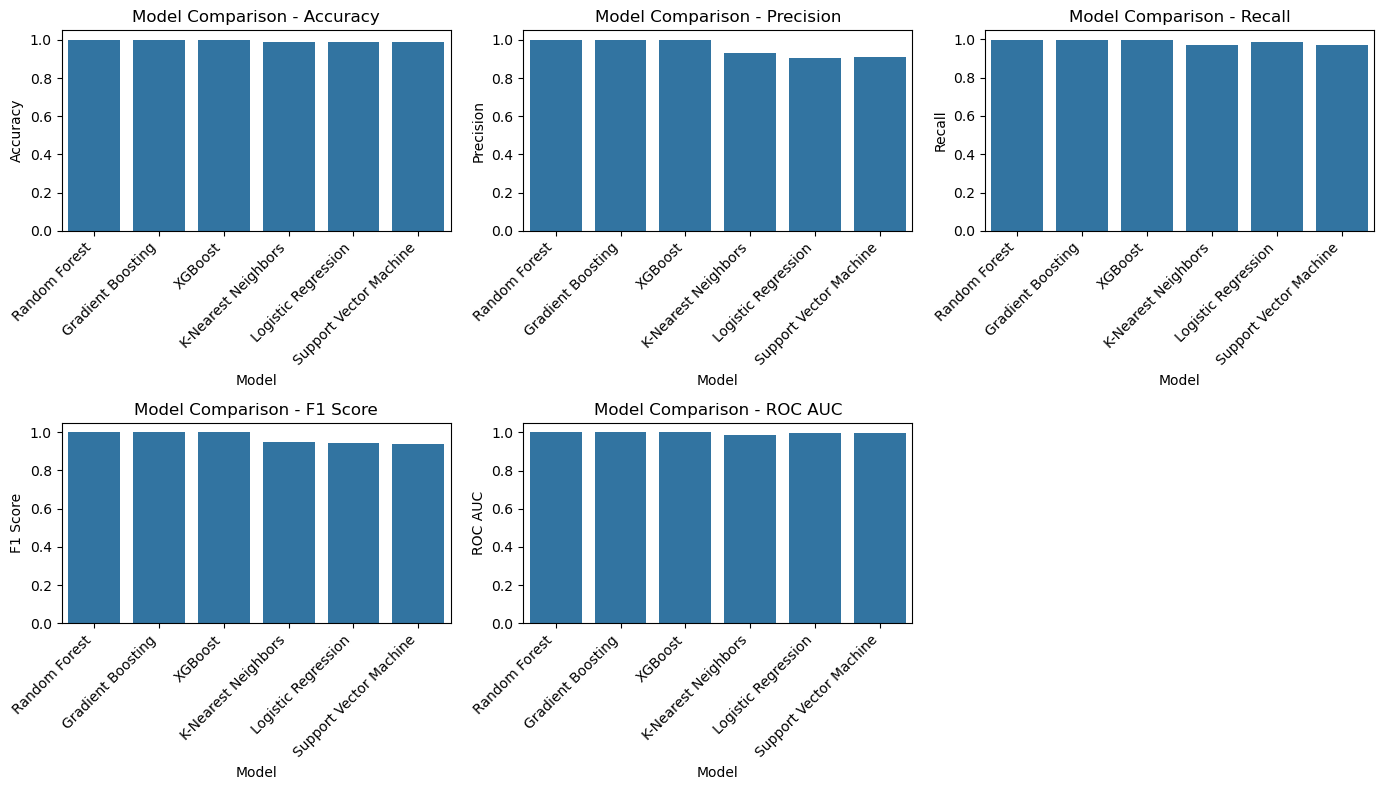

In [52]:
# Visualize model performance
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Model Comparison - {metric}')
plt.tight_layout()
plt.show()

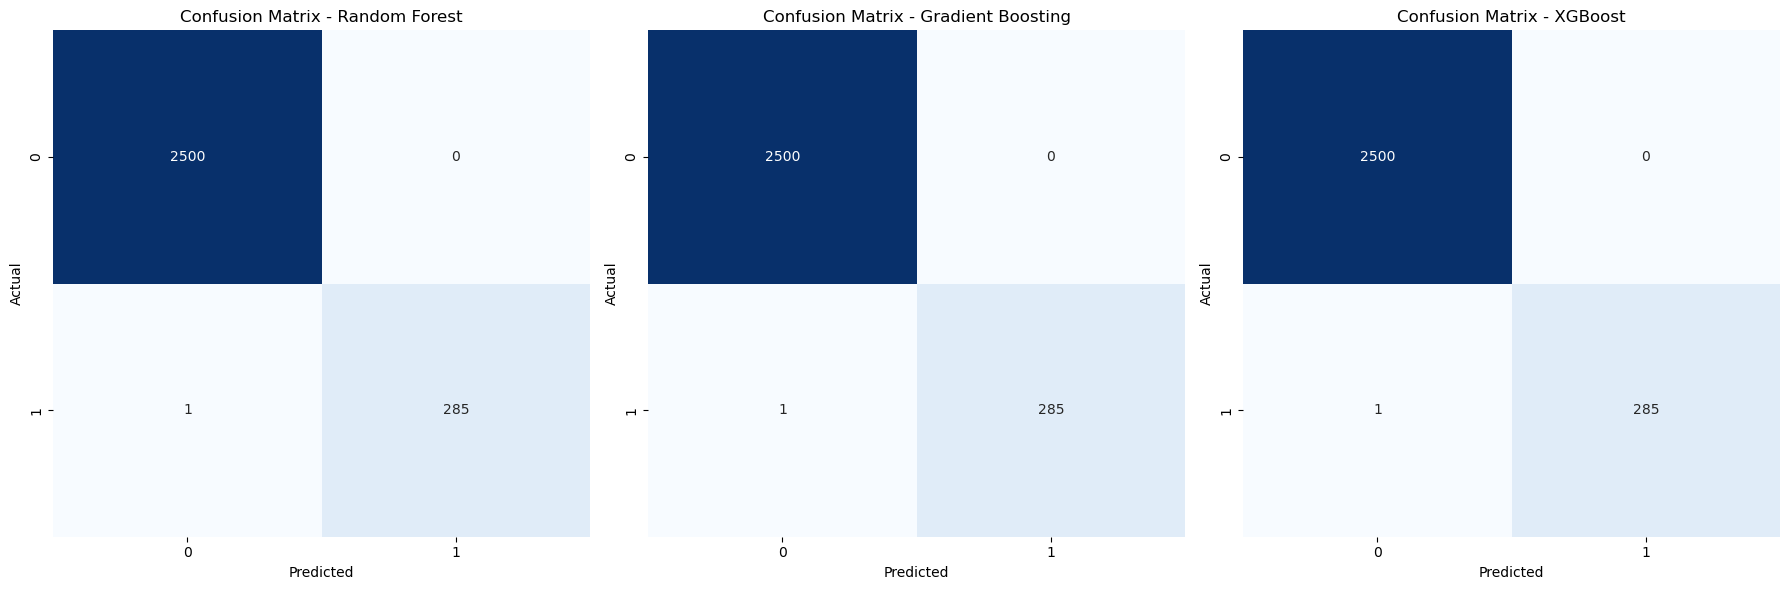

In [53]:
# Plot confusion matrices for the top 3 models
plt.figure(figsize=(18, 6))
top_models = results_df['Model'].head(3).tolist()
for i, result in enumerate([r for r in results if r['model_name'] in top_models]):
    plt.subplot(1, 3, i+1)
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {result['model_name']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

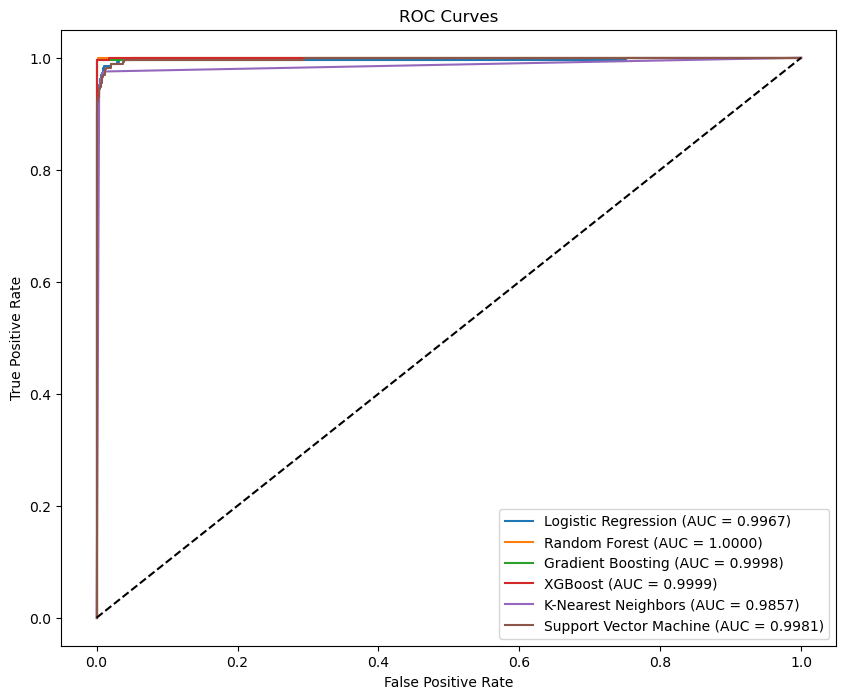

In [54]:
# Plot ROC curves for models with predict_proba
plt.figure(figsize=(10, 8))
for result in results:
    if result['has_predict_proba']:
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
        plt.plot(fpr, tpr, label=f"{result['model_name']} (AUC = {result['roc_auc']:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

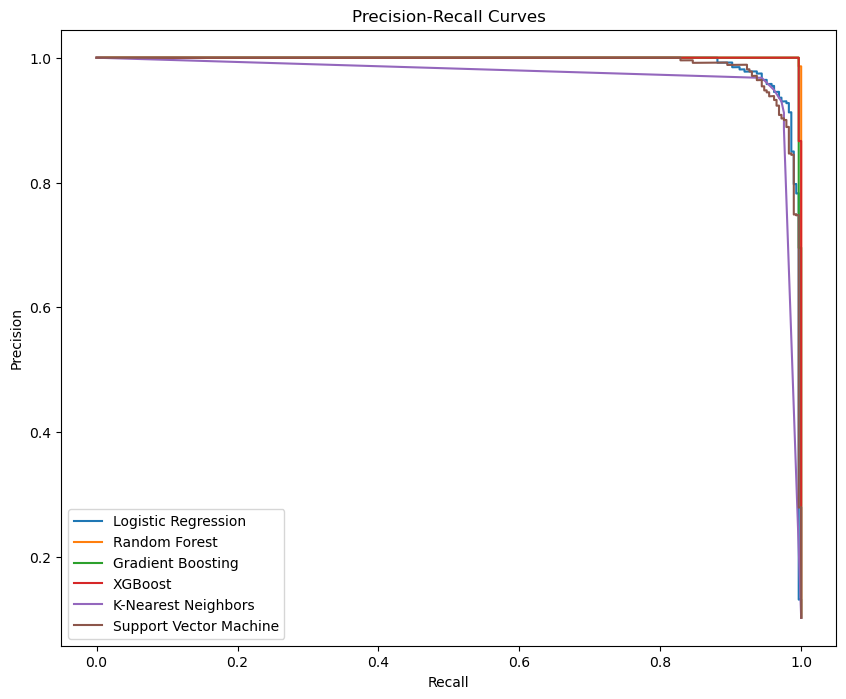

In [55]:
# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for result in results:
    if result['has_predict_proba']:
        precision, recall, _ = precision_recall_curve(y_test, result['y_prob'])
        plt.plot(recall, precision, label=f"{result['model_name']}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

In [56]:
# Get the best model based on F1 score
best_model_name = results_df.iloc[0]['Model']
best_model = next(result['model'] for result in results if result['model_name'] == best_model_name)
print(f"Best performing model: {best_model_name}")

Best performing model: Random Forest


Feature Importance for the best model:
              Feature  Importance
0                step    0.343068
6      balanceOrgDiff    0.214499
8     orgBalanceRatio    0.082299
12   amountToOrgRatio    0.081294
3      newbalanceOrig    0.050709
16       type_PAYMENT    0.042985
2       oldbalanceOrg    0.036060
1              amount    0.028967
13  amountToDestRatio    0.024063
17      type_TRANSFER    0.024056


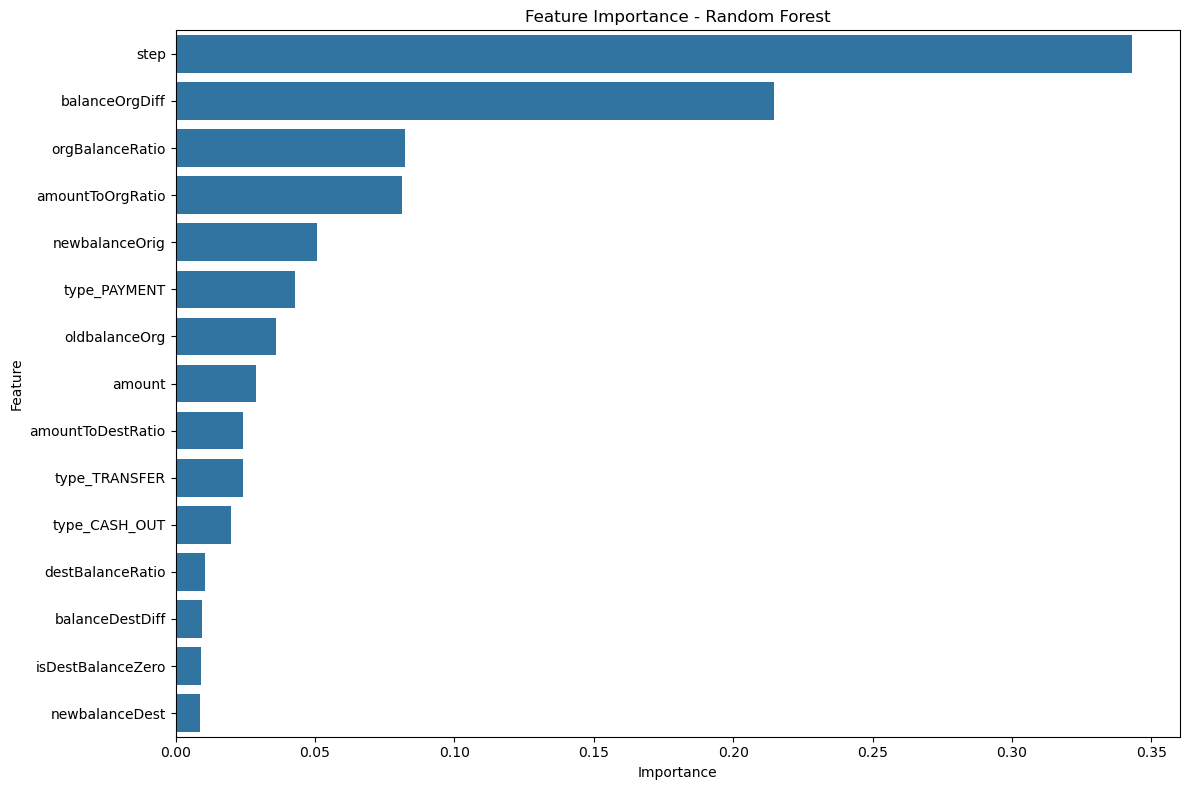

Model evaluation completed.


In [59]:
# Feature importance for the best model (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("Feature Importance for the best model:")
    print(feature_importance.head(10))
        # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
elif best_model_name == "Logistic Regression":
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    print("Feature Coefficients for Logistic Regression:")
    print(feature_importance)

    # Plot feature coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
    plt.title('Feature Coefficients - Logistic Regression')
    plt.tight_layout()
    plt.show()

print("Model evaluation completed.")